Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('error.csv')

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


In [4]:
data.set_index('iot_number', inplace=True)
data

,error_case_number
iot_number,
1,4.5
2,2.5
3,2.0
4,3.0
5,0.5
...,...
96,2.0
97,3.0
98,5.5


In [8]:
#100개의 데이터 각각 200개의 제품이 있음
data['p']=data['error_case_number']/200*100
#불량율
mean=data['p'].mean()
#관리중심선(CL)

In [9]:
#UCL : 평균불량율+lot불량율.std()*3
ucl=mean+data['p'].std()*3
lcl=mean-data['p'].std()*3

print(ucl, lcl)

6.6792290403091155 -3.2692290403091153


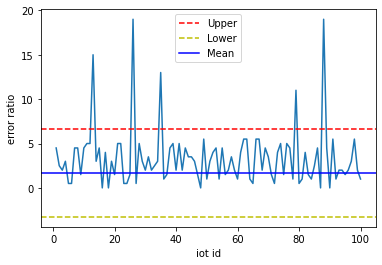

In [13]:
#시각화
import matplotlib.pyplot as plt
plt.plot(data['error_case_number'])
plt.axhline(y=ucl, color='r', linestyle='--', label='Upper')
plt.axhline(y=lcl, color='y', linestyle='--', label='Lower')
plt.axhline(y=mean, color='b', label='Mean')
plt.legend()
plt.ylabel('error ratio')
plt.xlabel('iot id')
plt.show()